In [1]:
# Adding dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics
import os

In [2]:
# Import the data
data_to_read = os.path.join('Resources','PyBer_ride_data.csv')

# Convert to Dataframe
pyber_ride_df = pd.read_csv(data_to_read)
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


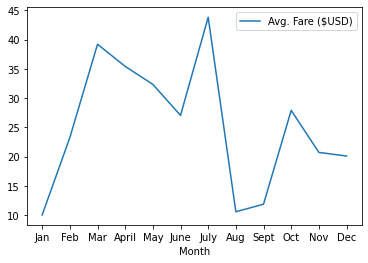

In [3]:
# Set x-axis and tick locations
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]

# Plotting to the dataframe
pyber_ride_df.plot('Month', 'Avg. Fare ($USD)')
plt.xticks(tick_locations,pyber_ride_df['Month'])
plt.show()

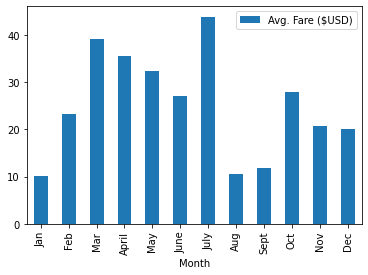

In [4]:
# Creating a bar chart
pyber_ride_df.plot('Month', 'Avg. Fare ($USD)', kind='bar')
plt.show()

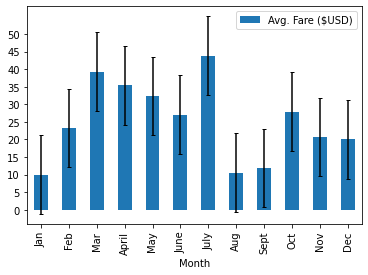

In [5]:
# Creating an Error bar display
pyber_ride_df.plot('Month', 'Avg. Fare ($USD)', kind='bar', yerr=statistics.stdev(pyber_ride_df['Avg. Fare ($USD)']), capsize=2)
plt.yticks(np.arange(0,51,step=5))
plt.show()

In [6]:
# Import the datafiles
load_city_data = os.path.join('Resources', 'city_data.csv')
load_ride_data = os.path.join('Resources', 'ride_data.csv')

city_df = pd.read_csv(load_city_data)
ride_df = pd.read_csv(load_ride_data)
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [8]:
city_df.isna().sum()
ride_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
# Check the data types of the columns
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Check the data types of the columns
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
# Get unique cities
city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# Sum of Urban cities
urban_city_count = sum(city_df['type'] == 'Urban')
suburban_city_count = sum(city_df['type'] == 'Suburban')
rural_city_count = sum(city_df['type'] == 'Rural')
city_counts = (urban_city_count,suburban_city_count,rural_city_count)
city_counts

(66, 36, 18)

In [13]:
# Merge the data frames
pyber_data_df = pd.merge(ride_df,city_df, how='left', on= ['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Dataframe Creation for Each City Type

In [14]:
# Creating the dataframes for the cities
urban_city_df = pyber_data_df.loc[pyber_data_df['type'] == 'Urban']
urban_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Creating the dataframes for Suburban and Rural cities
suburban_city_df = pyber_data_df.loc[pyber_data_df['type'] == 'Suburban']
rural_city_df = pyber_data_df.loc[pyber_data_df['type'] == 'Rural']


### Ride Count for Each City Type

In [16]:
# Create the urban ride count.
urban_ride_count = urban_city_df.groupby(['city'])['ride_id'].count()

# Create the suburban and rural ride count.
suburban_ride_count = suburban_city_df.groupby(['city'])['ride_id'].count()
rural_ride_count = rural_city_df.groupby(['city'])['ride_id'].count()

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

### Average Fare for Each City

In [17]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_city_df.groupby(['city'])['fare'].mean()

# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_city_df.groupby(['city'])['fare'].mean()
rural_avg_fare = rural_city_df.groupby(['city'])['fare'].mean()

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

### Average Number of Drivers per City Type

In [18]:
# Get the average number of drivers for each urban city, suburban city and rural city
urban_driver_count = urban_city_df.groupby(['city'])['driver_count'].mean()

# Get the average number of drivers for each suburban city and rural city
suburban_driver_count = suburban_city_df.groupby(['city'])['driver_count'].mean()
rural_driver_count = rural_city_df.groupby(['city'])['driver_count'].mean()

urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

### Plotting the scatter (Bubble) Plot
##### * x-axis is the number of rides,
##### * y-axis is the average fare for each city and
##### * Marker size is the average number of drivers in each city.

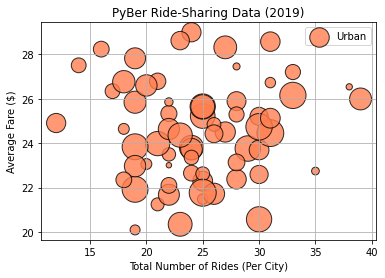

In [19]:
# Urban Bubble Plot
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, label='Urban', c='coral',edgecolors='black',alpha=0.8, linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid(True)
plt.show()

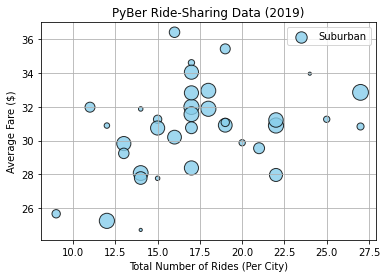

In [20]:
# Suburban Bubble Plot
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, label='Suburban', c='skyblue',edgecolors='black',alpha=0.8, linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid(True)
plt.show()

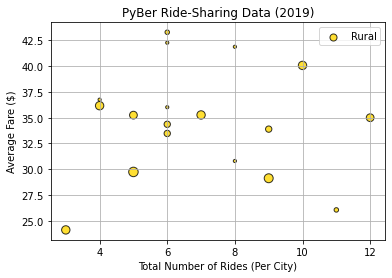

In [21]:
# Rural Bubble Plot
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, label='Rural', c='gold',edgecolors='black',alpha=0.8, linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid(True)
plt.show()


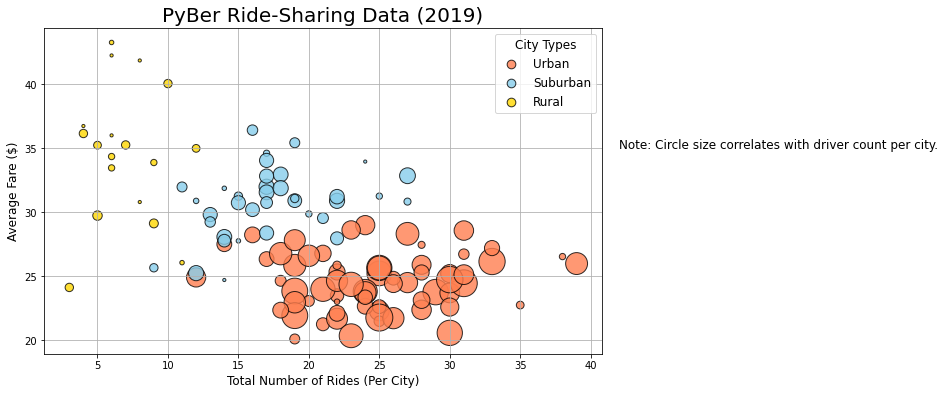

In [22]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, label='Urban', c='coral',edgecolors='black',alpha=0.8, linewidths=1)

plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, label='Suburban', c='skyblue',edgecolors='black',alpha=0.8, linewidths=1)

plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, label='Rural', c='gold',edgecolors='black',alpha=0.8, linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)
plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.show()


## Summary Statistics for Number of Rides by City Type

In [23]:
# Get summary statistics
urban_city_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [24]:
# Get Summary Stats
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [25]:
# Calculate the average ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [26]:
# Median
urban_ride_count.median()

24.0

In [27]:
# Mode
urban_ride_count.mode()
suburban_ride_count.mode()

0    17
dtype: int64

In [28]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts


In [29]:
# Calculate the measure of central tendency
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'Urban Mean: {mean_urban_ride_count}\n'
      f'Suburban Median: {median_urban_ride_count}\n'
      f'Rural Mode: {mode_urban_ride_count}')

Urban Mean: 24.62121212121212
Suburban Median: 24.0
Rural Mode: ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [30]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'Suburban Mean: {mean_suburban_ride_count}\n'
      f'Suburban Median: {median_suburban_ride_count}\n'
      f'Suburban Mode: {mode_suburban_ride_count}')

Suburban Mean: 17.36111111111111
Suburban Median: 17.0
Suburban Mode: ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [31]:
mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'Rural Mean: {mean_rural_ride_count}\n'
      f'Rural Median: {median_rural_ride_count}\n'
      f'Rural Mode: {mode_rural_ride_count}')

Rural Mean: 6.944444444444445
Rural Median: 6.0
Rural Mode: ModeResult(mode=array([6], dtype=int64), count=array([5]))


### Summary Statistics for Fare by City Type

In [32]:
# Fare for each city
urban_fares = urban_city_df['fare']
suburban_fares = suburban_city_df['fare']
rural_fares = rural_city_df['fare']

In [33]:
# Statistics for fares by city
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

# suburban
mean_suburban_fares =np.mean(suburban_fares)
median_suburban_fares =np.median(suburban_fares)
mode_suburban_fares =sts.mode(suburban_fares)

# rural
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

### Summary Statistics for Number of Drivers by City Type

In [34]:
# Driver count for each of the cities
urban_drivers = urban_city_df['driver_count']
suburban_drivers = suburban_city_df['driver_count']
rural_drivers = rural_city_df['driver_count']
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [35]:
# statistics of the cities by driver count
# urban drivers
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

# suburban drivers
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

# rural drivers
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

## Box and Whisker Plots

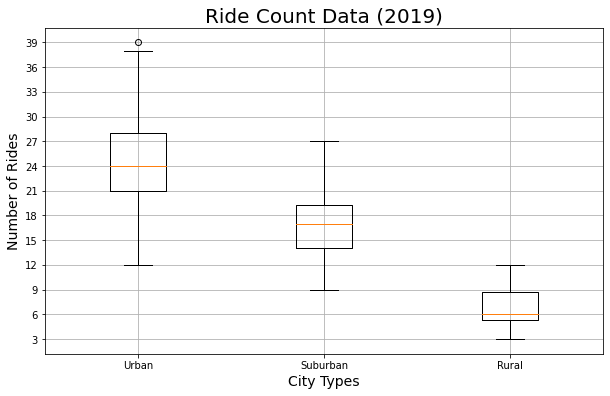

In [36]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ['Urban','Suburban','Rural']
ride_count_data = [urban_ride_count, suburban_ride_count,rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(3,42,3.0))
ax.grid()
plt.savefig('analysis/Fig2.png')
plt.show()


In [37]:
# Get City that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


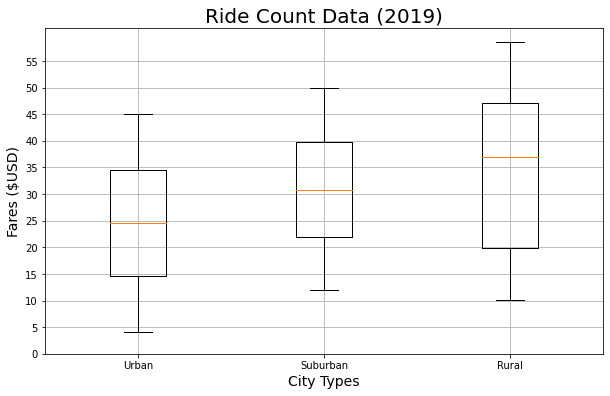

In [38]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ['Urban','Suburban','Rural']
fares_data = [urban_fares, suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Fares ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,60,5.0))
ax.grid()
plt.savefig('analysis/Fig3.png')
plt.show()

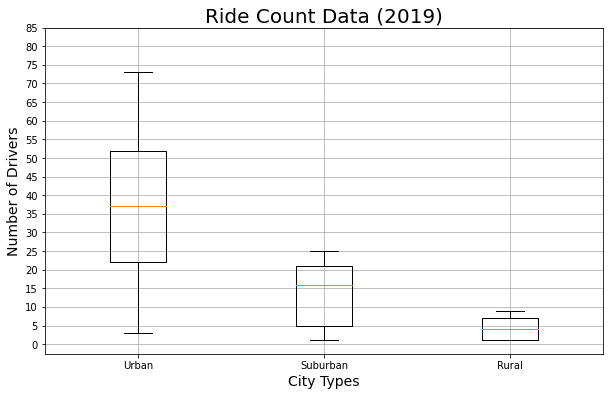

In [39]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ['Urban','Suburban','Rural']
fares_data = [urban_drivers, suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,90,5.0))
ax.grid()
plt.savefig('analysis/Fig4.png')
plt.show()


## % Fares of Each City Type

In [40]:
city_fares = [rural_fares.sum(), suburban_fares.sum(), urban_fares.sum()]
city_fares_labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.1)

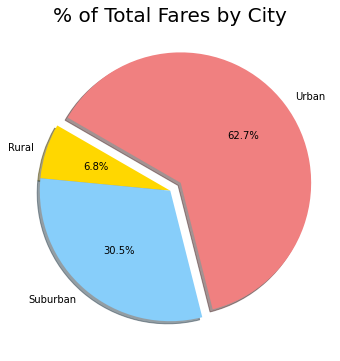

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(city_fares,
       labels=city_fares_labels,
       explode=explode,
       startangle=150,
       autopct='%1.1f%%', shadow=True,
       colors=["gold", "lightskyblue", "lightcoral"])
ax.set_title('% of Total Fares by City', fontsize=20)
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/Fig5.png')
plt.show()


## Ride Percentages

In [42]:
total_rides = pyber_data_df.groupby(['type'])['ride_id'].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

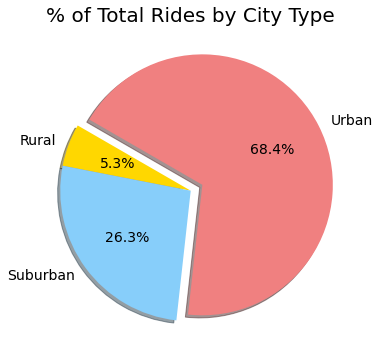

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(total_rides,
       labels=['Rural', 'Suburban', 'Urban'],
       explode=(0,0,0.1),
       startangle=150, autopct='%1.1f%%', shadow=True,
       colors=["gold", "lightskyblue", "lightcoral"])
ax.set_title('% of Total Rides by City Type', fontsize=20)
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/Fig6.png')
plt.show()

## Driver Percentages

In [44]:
total_drivers = pyber_data_df.groupby(['type'])['driver_count'].sum()
total_drivers/pyber_data_df['driver_count'].sum() *100

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

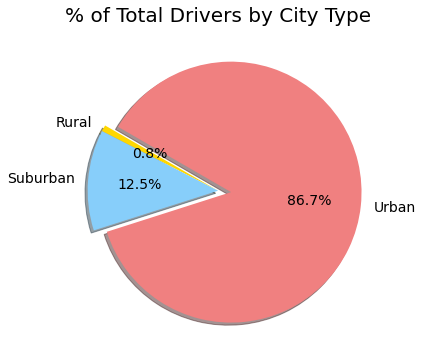

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(total_drivers,
       labels=['Rural', 'Suburban', 'Urban'],
       explode=(0,0,0.1),
       startangle=150, autopct='%1.1f%%', shadow=True,
       colors=["gold", "lightskyblue", "lightcoral"])
ax.set_title('% of Total Drivers by City Type', fontsize=20)
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/Fig7.png')
plt.show()
